In [4]:
import numpy as np
import pandas as pd
import os

In [5]:
import gensim
#import pyLDAvis.gensim
import pyLDAvis.gensim_models

In [6]:
import nltk
#nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tette\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import TfidfModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords

In [8]:
import re
import string

In [9]:
import pyLDAvis
#import pyLDAvis.gensim
import pyLDAvis.gensim_models
import seaborn as sns
import matplotlib as plt

In [10]:
df = pd.read_csv('UScomments.csv', on_bad_lines='skip')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
df.head()

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [12]:
partial=df[df['video_id']=='XpVt6Z1Gjjo'].copy()

In [13]:
#partial=df.iloc[0:1000,]
#options = ['logan']
#checker = df[df['comment_text'].isin(options)]
#print(checker)
pokemon = partial[partial['comment_text'].str.contains("Evan", case=False)]
print(pokemon)
#rslt_df = dataframe[dataframe['Stream'].isin(options)]

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.           video_id                                       comment_text likes  \
12      XpVt6Z1Gjjo  Honestly Evan is so annoying. Like its not fun...     0   
26      XpVt6Z1Gjjo            Evan was being such a dick on this vlog     0   
28      XpVt6Z1Gjjo  Evan is a horrible human being he also looks s...     0   
35      XpVt6Z1Gjjo  Evan is being a douch Logans getting pissed, L...     0   
53      XpVt6Z1Gjjo  Evan is just taking ur money for granted cause...     0   
59      XpVt6Z1Gjjo            Evan lowkey is starting to piss me off!     0   
72      XpVt6Z1Gjjo                       😂😂😂😂😭 I love Evan so much!!!     2   
17044   XpVt6Z1Gjjo  tell evan to not be a dick on a vlog plz it wi...     0   
17057   XpVt6Z1Gjjo  Anyone know that song that was played when Log...     0   
17091   XpVt6Z1Gjjo  Logan: Do ya wanna do you're thing now?\nEva

In [14]:
#evan.head()

In [15]:
df.iloc[500,:]

video_id                                              8wNr-NQImFg
comment_text    4:30 the universe itself is comparable to the ...
likes                                                           0
replies                                                         0
Name: 500, dtype: object

In [16]:
partial.tail()

,video_id,comment_text,likes,replies
121660,XpVt6Z1Gjjo,Aw Logan,0,0
121661,XpVt6Z1Gjjo,What kind of an asshole fakes color blindness,0,0
121662,XpVt6Z1Gjjo,Oh hi mark.,2,0
121663,XpVt6Z1Gjjo,O M G !😂💚💚💚🔥🔥🔥🔥,3,0
121664,XpVt6Z1Gjjo,at10 30 on the vid he put the lock back on the...,0,1


In [17]:
partial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 121664
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      800 non-null    object
 1   comment_text  800 non-null    object
 2   likes         800 non-null    object
 3   replies       800 non-null    object
dtypes: object(4)
memory usage: 31.2+ KB


In [18]:
#data_words = partial_df.tolist()

In [19]:
'''

# Change to lowercase
data['Title'] = data['Title'].map(lambda x: x.lower())
data['Description'] = data['Description'].map(lambda x: x.lower())

# Remove numbers
data['Title'] = data['Title'].map(lambda x: re.sub(r'\d+', '', x))
data['Description'] = data['Description'].map(lambda x: re.sub(r'\d+', '', x))

# Remove Punctuation
data['Title']  = data['Title'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))
data['Description']  = data['Description'].map(lambda x: x.translate(x.maketrans('', '', string.punctuation)))

# Remove white spaces
data['Title'] = data['Title'].map(lambda x: x.strip())
data['Description'] = data['Description'].map(lambda x: x.strip())

# Tokenize into words
data['Title'] = data['Title'].map(lambda x: word_tokenize(x))
data['Description'] = data['Description'].map(lambda x: word_tokenize(x))
 
# Remove non alphabetic tokens
data['Title'] = data['Title'].map(lambda x: [word for word in x if word.isalpha()])
data['Description'] = data['Description'].map(lambda x: [word for word in x if word.isalpha()])
# filter out stop words
stop_words = set(stopwords.words('english'))
data['Title'] = data['Title'].map(lambda x: [w for w in x if not w in stop_words])
data['Description'] = data['Description'].map(lambda x: [w for w in x if not w in stop_words])

# Word Lemmatization
lem = WordNetLemmatizer()
data['Title'] = data['Title'].map(lambda x: [lem.lemmatize(word,"v") for word in x])
data['Description'] = data['Description'].map(lambda x: [lem.lemmatize(word,"v") for word in x])

# Turn lists back to string
data['Title'] = data['Title'].map(lambda x: ' '.join(x))
data['Description'] = data['Description'].map(lambda x: ' '.join(x))
'''

<>:1: DeprecationWarning: invalid escape sequence \d
<>:1: DeprecationWarning: invalid escape sequence \d
C:\Users\tette\AppData\Local\Temp/ipykernel_2076/1612080091.py:1: DeprecationWarning: invalid escape sequence \d
  '''


'\n\n# Change to lowercase\ndata[\'Title\'] = data[\'Title\'].map(lambda x: x.lower())\ndata[\'Description\'] = data[\'Description\'].map(lambda x: x.lower())\n\n# Remove numbers\ndata[\'Title\'] = data[\'Title\'].map(lambda x: re.sub(r\'\\d+\', \'\', x))\ndata[\'Description\'] = data[\'Description\'].map(lambda x: re.sub(r\'\\d+\', \'\', x))\n\n# Remove Punctuation\ndata[\'Title\']  = data[\'Title\'].map(lambda x: x.translate(x.maketrans(\'\', \'\', string.punctuation)))\ndata[\'Description\']  = data[\'Description\'].map(lambda x: x.translate(x.maketrans(\'\', \'\', string.punctuation)))\n\n# Remove white spaces\ndata[\'Title\'] = data[\'Title\'].map(lambda x: x.strip())\ndata[\'Description\'] = data[\'Description\'].map(lambda x: x.strip())\n\n# Tokenize into words\ndata[\'Title\'] = data[\'Title\'].map(lambda x: word_tokenize(x))\ndata[\'Description\'] = data[\'Description\'].map(lambda x: word_tokenize(x))\n \n# Remove non alphabetic tokens\ndata[\'Title\'] = data[\'Title\'].map(l

In [20]:
#partial_df['comment_text'] = partial_df['comment_text'].str.replace("[^a-zA-Z#]", " ")
#Removing Punctuations, Numbers and Special Characters.
#partial_df = partial_df.str.replace("[^a-zA-Z#]", " ")
#partial_df[0]

In [21]:
#partial_df= partial_df.apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [22]:
#partial_df = partial_df.apply(lambda x:x.lower())

In [23]:
partial.dropna(axis = 0, how ='any',inplace=True) 

In [24]:
def clean_text(text): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if (not w.isdigit() and  (not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [25]:
import nltk

In [26]:
partial.dropna(axis = 0, how ='any',inplace=True) 
partial['comment_text'] = partial['comment_text'].apply(clean_text)
#review_data['Text'] = review_data['Text'].apply(clean_text)


In [27]:
partial['comment_text']

0                                         logan paul ‼️‼️‼️
1         been following from start your vine channel ha...
2                                             kong maverick
3                                                attendance
4                                                  trending
                                ...                        
121660                                                logan
121661              what kind asshole fakes color blindness
121662                                                 mark
121663                                             😂💚💚💚🔥🔥🔥🔥
121664                                  at10 lock back case
Name: comment_text, Length: 800, dtype: object

In [28]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text


In [29]:
partial.iloc[20:35,:]

,video_id,comment_text,likes,replies
20,XpVt6Z1Gjjo,honey nooo cant believe almost mili year damnn,0,0
21,XpVt6Z1Gjjo,jake paul fastest growing channel million that...,1,0
22,XpVt6Z1Gjjo,pewdiepie accidentally played song with words ...,0,0
23,XpVt6Z1Gjjo,should prank that broke your play puttun,0,0
24,XpVt6Z1Gjjo,love logan jake much thay amazing look them mu...,1,0
25,XpVt6Z1Gjjo,trending lets,0,0
26,XpVt6Z1Gjjo,evan being such dick this vlog,0,0
27,XpVt6Z1Gjjo,allot diss likes comments lets diss like this ...,0,0
28,XpVt6Z1Gjjo,evan horrible human being also looks jealous w...,0,0
29,XpVt6Z1Gjjo,love much love meet live israel really inspire...,0,0


In [30]:
# remove stopwords from the text
partial['comment_text']=partial['comment_text'].apply(remove_stopwords)

In [31]:
partial['comment_text']

0                               logan paul ‼️‼️‼️
1         following start vine channel seen vlogs
2                                   kong maverick
3                                      attendance
4                                        trending
                           ...                   
121660                                      logan
121661         kind asshole fakes color blindness
121662                                       mark
121663                                   😂💚💚💚🔥🔥🔥🔥
121664                        at10 lock back case
Name: comment_text, Length: 800, dtype: object

In [32]:
import spacy

In [33]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ','VERB','ADV']): 
    output = []
    for sent in texts:
        doc = nlp(sent) 
        output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
    return output

In [34]:
text_list=partial['comment_text'].tolist()
print(text_list[1])
tokenized_comments = lemmatization(text_list)
print(tokenized_comments[1])

following start vine channel seen vlogs
['follow', 'start', 'vine', 'channel', 'see', 'vlog']


In [35]:
#partial['tf_comments']=tokenized_comments

In [36]:
tokenized_comments = [ele for ele in tokenized_comments if ele != []]
print(tokenized_comments[:5])

[['logan'], ['follow', 'start', 'vine', 'channel', 'see', 'vlog'], ['attendance'], ['trend'], ['trend', 'ayyeeeee']]


In [37]:
tokenized_comments[:5]

[['logan'],
 ['follow', 'start', 'vine', 'channel', 'see', 'vlog'],
 ['attendance'],
 ['trend'],
 ['trend', 'ayyeeeee']]

In [38]:
#dictionary=id2word
dictionary = corpora.Dictionary(tokenized_comments)
corpus = [dictionary.doc2bow(txt) for txt in tokenized_comments]

In [39]:
print(dictionary)

Dictionary<857 unique tokens: ['logan', 'channel', 'follow', 'see', 'start']...>


In [40]:
#lda_model=gensim.models.ldamodel.LdaModel
#lda_model = LDA(corpus=doc2, id2word=dictionary, num_topics=10, random_state=100,
#                chunksize=1000, passes=50,iterations=100)

In [41]:
lda_model=gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=dictionary,num_topics=16,random_state=100,
        update_every=1,chunksize=100,passes=10,alpha="auto")


In [42]:
lda_model.print_topics()

[(0,
  '0.192*"happy" + 0.140*"year" + 0.050*"vlogge" + 0.041*"back" + 0.036*"join" + 0.034*"freak" + 0.025*"like" + 0.020*"vlogging" + 0.020*"right" + 0.018*"cause"'),
 (1,
  '0.114*"brother" + 0.105*"s" + 0.088*"never" + 0.043*"child" + 0.035*"idiot" + 0.032*"honestly" + 0.031*"bad" + 0.022*"hear" + 0.021*"die" + 0.017*"ve"'),
 (2,
  '0.234*"️" + 0.091*"single" + 0.090*"vlogaversery" + 0.090*"remember" + 0.045*"logan" + 0.042*"look" + 0.032*"much" + 0.023*"clicked" + 0.019*"😘" + 0.015*"🏻"'),
 (3,
  '0.126*"video" + 0.094*"make" + 0.068*"youtube" + 0.061*"know" + 0.058*"even" + 0.040*"merch" + 0.035*"cool" + 0.032*"content" + 0.032*"really" + 0.028*"start"'),
 (4,
  '0.153*"change" + 0.137*"mean" + 0.116*"drug" + 0.094*"shit" + 0.074*"well" + 0.038*"do" + 0.025*"piece" + 0.020*"still" + 0.015*"❤" + 0.013*"pretty"'),
 (5,
  '0.146*"good" + 0.092*"watch" + 0.072*"ever" + 0.064*"vlog" + 0.037*"title" + 0.034*"help" + 0.030*"happen" + 0.027*"miss" + 0.027*"autism" + 0.026*"day"'),
 (6,
  

In [43]:
pyLDAvis.enable_notebook()
vis=pyLDAvis.gensim_models.prepare(lda_model,corpus,dictionary,mds="mmds",n_jobs=1)

E:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [44]:
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10    -0.388934  0.141348       1        1  12.801454
3      0.242481 -0.252919       2        1  11.652102
12     0.296921 -0.091524       3        1  10.066599
5      0.288867  0.114593       4        1   8.986096
6      0.204114  0.317242       5        1   8.832306
4      0.045031 -0.315943       6        1   6.389642
0     -0.279855 -0.130037       7        1   5.974037
15    -0.155959 -0.302351       8        1   5.107671
11    -0.161338 -0.020997       9        1   4.818726
14    -0.128313  0.139650      10        1   4.730438
8      0.151269  0.023292      11        1   4.679813
1     -0.016824 -0.140824      12        1   4.647963
2     -0.096877  0.353816      13        1   4.221403
13     0.029309  0.136783      14        1   3.198204
9     -0.032947  0.043968      15        1   2.311748
7      0.003055 -0.016095      16        1   1.581797, topic_info=          Term        Freq       Total Category  logprob  loglift
0        logan  184.000000  184.000000  Default  30.0000  30.0000
256          😂   53.000000   53.000000  Default  29.0000  29.0000
212    congrat   56.000000   56.000000  Default  28.0000  28.0000
28        evan   34.000000   34.000000  Default  27.0000  27.0000
12       happy   35.000000   35.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
588  classmate    0.041438    1.107329  Topic16  -7.0566   0.8611
589          😒    0.041438    1.107329  Topic16  -7.0566   0.8611
476       dent    0.041501    1.110139  Topic16  -7.0550   0.8601
477   universe    0.041501    1.110139  Topic16  -7.0550   0.8601
631      reach    0.041501    1.111198  Topic16  -7.0550   0.8591

[531 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
112       1  0.521229      able
167       3  0.833503  actually
51        4  0.723491    advice
58       15  0.796599    almost
86        2  0.783957      also
...     ...       ...       ...
10       13  0.962825         ️
11       13  0.657444         🏻
256       5  0.984810         😂
81       13  0.576265         😍
617      13  0.575537         😘

[274 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 4, 13, 6, 7, 5, 1, 16, 12, 15, 9, 2, 3, 14, 10, 8])

In [45]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_comments, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Coherence Score:  0.4777861497348158


In [46]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_comments, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4777861497348158


In [47]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [48]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus,
                                                        texts=tokenized_comments, start=2, limit=50, step=1)

In [49]:
import matplotlib.pyplot as plt

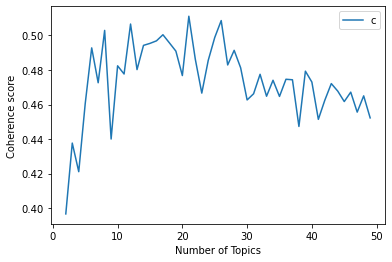

In [50]:
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [51]:
coherence_values[:11]

[0.3966409600352384,
 0.43766223078430766,
 0.42109196637763663,
 0.46051291987475046,
 0.4927906546298251,
 0.4725979491096692,
 0.502917124230719,
 0.44000950628192875,
 0.4824054083700634,
 0.47766685210081,
 0.5065966223944111]

In [52]:
#for m, cv in zip(x, coherence_values):
#    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

## Latent Semantic Analysis-LSA

In [53]:
indexing=df[df['video_id']=='XpVt6Z1Gjjo']

In [54]:
indexing.head(10)

,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0


In [55]:
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation \
                                        , preprocess_string, strip_short, stem_text
# preprocess given text
def preprocess(text):
    
    # clean text based on given filters
    CUSTOM_FILTERS = [lambda x: x.lower(), 
                                remove_stopwords, 
                                strip_punctuation, 
                                strip_short, 
                                stem_text]
    text = preprocess_string(text, CUSTOM_FILTERS)
    text=[ele for ele in text if ele != []]
    return text

# apply function to all reviews 
indexing['Clean'] = indexing['comment_text'].apply(lambda x: preprocess(x))

C:\Users\tette\AppData\Local\Temp/ipykernel_2076/1991177756.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indexing['Clean'] = indexing['comment_text'].apply(lambda x: preprocess(x))


In [56]:
indexing.iloc[20:30]

,video_id,comment_text,likes,replies,Clean
20,XpVt6Z1Gjjo,NO HONEY NOOO can't believe he has almost 12 m...,0,0,"[honei, nooo, can, believ, mili, year, damnn]"
21,XpVt6Z1Gjjo,Jake Paul is the fastest growing channel to hi...,1,0,"[jake, paul, fastest, grow, channel, hit, mill..."
22,XpVt6Z1Gjjo,lol PEWDIEPIE accidentally played song with wo...,0,0,"[lol, pewdiepi, accident, plai, song, word, ni..."
23,XpVt6Z1Gjjo,You should do a prank that you broke your pla...,0,0,"[prank, broke, plai, puttun]"
24,XpVt6Z1Gjjo,I love Logan and Jake so much and thay are so ...,1,0,"[love, logan, jake, thai, amaz, look, 😍💋💙👍]"
25,XpVt6Z1Gjjo,#1 on Trending let's go.,0,0,"[trend, let]"
26,XpVt6Z1Gjjo,Evan was being such a dick on this vlog,0,0,"[evan, dick, vlog]"
27,XpVt6Z1Gjjo,if you get allot of diss likes do you get on t...,0,0,"[allot, diss, like, comment, let, diss, like]"
28,XpVt6Z1Gjjo,Evan is a horrible human being he also looks s...,0,0,"[evan, horribl, human, look, jealou, open, lik..."
29,XpVt6Z1Gjjo,I love you so much I love to meet you But I li...,0,0,"[love, love, meet, live, israel, inspir, like,..."


In [57]:
indexing.shape

(800, 5)

In [58]:
df1 = indexing[indexing['Clean'].map(len) > 0]

In [59]:
df1.shape

(787, 5)

In [60]:
df1.head(10)

,video_id,comment_text,likes,replies,Clean
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,"[logan, paul, big, dai, ‼️‼️‼️]"
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,"[follow, start, vine, channel, seen, 365, vlog]"
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,"[kong, maverick]"
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,"[fan, attend]"
4,XpVt6Z1Gjjo,trending 😉,3,0,[trend]
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,"[trend, ayyeeee]"
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,"[end, 😭👍🏻❤️]"
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,[trend]
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,"[happi, year, vlogaversari]"
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,"[shit, brother, singl, handedli, ruin, youtub,..."


In [61]:
from gensim import corpora

# create a dictionary with the corpus
corpus = df1['Clean']
dictionary = corpora.Dictionary(corpus)

# convert corpus into a bag of words
bow = [dictionary.doc2bow(text) for text in corpus]

In [62]:
#tokenized_comments = [ele for ele in tokenized_comments if ele != []]

In [63]:
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

coherence_ = []
lsi_list = []

# find the coherence score with a different number of topics
for i in range(2,11):
    lsi = LsiModel(bow, num_topics=i, id2word=dictionary)
    lsi_list.append(lsi)
    coherence_model = CoherenceModel(model=lsi, texts=df1['Clean'], dictionary=dictionary, coherence='c_v')
    #coherence_ = coherence_model.get_coherence()
    coherence_.append(coherence_model.get_coherence())
print('Coherence:', coherence_)
    

Coherence: [0.6352514746518533, 0.44147233256546253, 0.5235281918791193, 0.4277464714336682, 0.3675528788825224, 0.4046905447497145, 0.3845600561691302, 0.36025883836712996, 0.4420265128600508]


In [64]:
len(coherence_)

9

In [65]:
sum=0
for i in coherence_:
    sum=sum+i
print(sum/len(coherence_))

0.4430097001731834


In [66]:
coherence_values[:9]

[0.3966409600352384,
 0.43766223078430766,
 0.42109196637763663,
 0.46051291987475046,
 0.4927906546298251,
 0.4725979491096692,
 0.502917124230719,
 0.44000950628192875,
 0.4824054083700634]

In [67]:
coherence_1=coherence_values[:9]

In [68]:
sum1=0
for i in coherence_1:
    sum1+=i
print(sum1/len(coherence_1))

0.4562920799660153
